In [1]:
import yfinance as yf
import pandas as pd

In [2]:
yf.download('AAPL', start='2018-01-01')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.950497,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.943359,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.133545,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.601868,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.447346,82271200
...,...,...,...,...,...,...
2022-12-07,142.190002,143.369995,140.000000,140.940002,140.940002,69721100
2022-12-08,142.360001,143.520004,141.100006,142.649994,142.649994,62128300
2022-12-09,142.339996,145.570007,140.899994,142.160004,142.160004,76069500


In [3]:
yf.download('003490.KS', start='2018-01-01')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,34100.0,36100.0,34100.0,35900.0,35715.164062,1360084
2018-01-03,35950.0,36150.0,35550.0,35750.0,35565.937500,497403
2018-01-04,35500.0,35950.0,34900.0,34900.0,34720.312500,571308
2018-01-05,35250.0,35250.0,34450.0,34900.0,34720.312500,489822
2018-01-08,35100.0,36150.0,35100.0,36100.0,35914.136719,841491
...,...,...,...,...,...,...
2022-12-08,26050.0,26050.0,25400.0,26000.0,26000.000000,2160886
2022-12-09,26100.0,26300.0,25800.0,26050.0,26050.000000,1324300
2022-12-12,25900.0,26050.0,25350.0,25600.0,25600.000000,1097222


In [4]:
AAPL = yf.download('AAPL', start='2020-01-01')

[*********************100%***********************]  1 of 1 completed


In [5]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,72.482498,73.419998,72.379997,73.412498,71.920570,100805600
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.561539,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.846375,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.426819,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.081482,108872000


In [7]:
## 소수점 2번째 자리까지만 두고 반올림
AAPL[["Open", "High", "Low", "Close"]] = \
    AAPL[["Open", "High", "Low", "Close"]].round(2)

In [9]:
## 결측치가 존재하는가? 
AAPL.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
## 등락폭, 등락율 파생변수 생성
## 등락폭 = 종가 - 시가
## 등락율 = 등락폭 / 시가 * 100

AAPL["등락폭"] = AAPL["Close"] - AAPL["Open"]
AAPL["등락율"] = AAPL["등락폭"] / AAPL["Open"] * 100
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume,등락폭,등락율
Date,,,,,,,,
2019-12-31,72.48,73.42,72.38,73.41,71.920570,100805600,0.93,1.283113
2020-01-02,74.06,75.15,73.80,75.09,73.561539,135480400,1.03,1.390764
2020-01-03,74.29,75.14,74.12,74.36,72.846375,146322800,0.07,0.094225
2020-01-06,73.45,74.99,73.19,74.95,73.426819,118387200,1.50,2.042206
2020-01-07,74.96,75.22,74.37,74.60,73.081482,108872000,-0.36,-0.480256


In [11]:
## 시각화 
import matplotlib.pyplot as plt

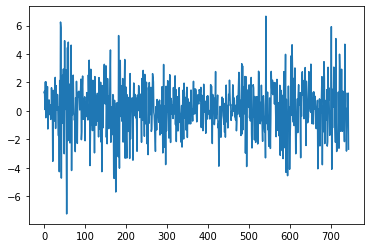

In [13]:
plt.plot(AAPL["등락율"].values)
plt.show()

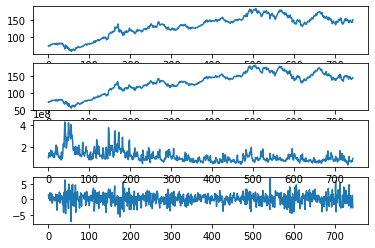

In [14]:
## 그래프 4개를 출력
## subplot(행의수, 열의수, 선택할 영역) 
# -> 영역 나누는 작업 , 나눈 영역에서 영역을 선택
## ex) subplot(2, 2, 1) - 
# 2행 2열로 영역 나눈다. -> 4개로 만든다. -> 1번 영역 선택

#영역 분할 및 선택
plt.subplot(4, 1, 1)
#그래프 그리기
plt.plot(AAPL["Open"].values)
#영역 선택
plt.subplot(4, 1, 2)
plt.plot(AAPL["Close"].values)
plt.subplot(4, 1, 4)
plt.plot(AAPL["등락율"].values)
plt.subplot(4, 1, 3)
plt.plot(AAPL["Volume"].values)
plt.show()